In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas.tools import sjoin
import pandas as pd

In [4]:
# Load shapefiles into GeoDataFrames
burned_boundaries_gdf = gpd.read_file('mtbs_perimeter_data')
california_tract_gdf = gpd.read_file('ca_census_tract')
fire_occurance_gdf = gpd.read_file('mtbs_fod_pts_data')

# Display CRS information
print("Burned Boundaries CRS:", burned_boundaries_gdf.crs)
print("California Tract CRS:", california_tract_gdf.crs)
print("Fire Occurance CRS:", fire_occurance_gdf.crs)

Burned Boundaries CRS: EPSG:4269
California Tract CRS: EPSG:4269
Fire Occurance CRS: EPSG:4269


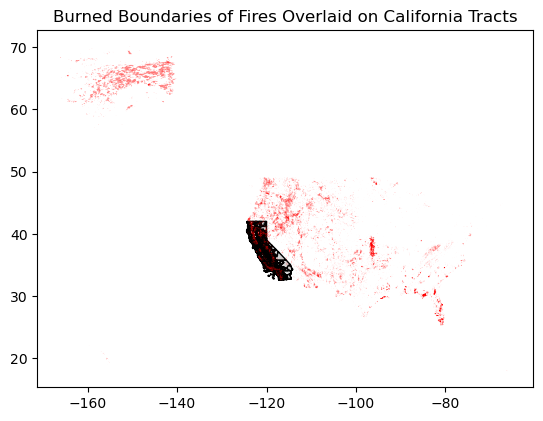

In [10]:
# Plot California counties
ax = california_tract_gdf.plot(color='lightgrey', edgecolor='black')

# Overlay burned boundaries on the same map
burned_boundaries_gdf.plot(ax=ax, color='red', alpha=0.5)

# Set plot title
plt.title('Burned Boundaries of Fires Overlaid on California Tracts')

# Show the plot
plt.show()

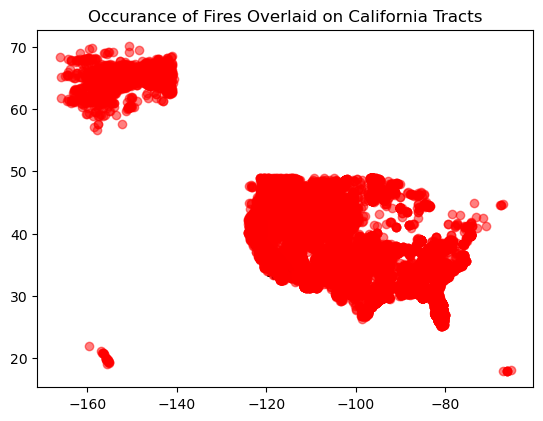

In [9]:
# Plot California counties
ax = california_tract_gdf.plot(color='lightgrey', edgecolor='black')

# Overlay burned boundaries on the same map
fire_occurance_gdf.plot(ax=ax, color='red', alpha=0.5)

# Set plot title
plt.title('Occurance of Fires Overlaid on California Tracts')

# Show the plot
plt.show()

In [14]:
pd.set_option('display.max_columns', None)

# Display the first few rows of the GeoDataFrame
print("Sample of Burned Boundaries Data:")
print(burned_boundaries_gdf.head())

Sample of Burned Boundaries Data:
                Event_ID irwinID     Incid_Name Incid_Type  Map_ID Map_Prog  \
0  AK6448214467319840607    None  GLACIER CREEK   Wildfire    4534     MTBS   
1  SD4308410285019840906    None         SANDOZ   Wildfire    4535     MTBS   
2  MT4880411345819840819    None      NAPI PEAK   Wildfire    4536     MTBS   
3  MT4533610695819840826    None          KIRBY   Wildfire    4537     MTBS   
4  MT4561710632319840918    None     LAKE CREEK   Wildfire    4538     MTBS   

     Asmnt_Type  BurnBndAc BurnBndLat BurnBndLon     Ig_Date           Pre_ID  \
0  Initial (SS)       1897     64.482   -144.673  1984-06-07             None   
1       Initial       2691     43.084   -102.850  1984-09-06  503303019840622   
2      Extended       3680     48.804   -113.458  1984-08-19  504102619840614   
3      Extended       1597     45.336   -106.958  1984-08-26  503602819840814   
4       Initial       3617     45.617   -106.323  1984-09-18  503602819840814   

    

In [6]:
# Display the first few rows of the GeoDataFrame
print("Sample of Fire Occurance Data:")
print(fire_occurance_gdf.head())

Sample of Fire Occurance Data:
                Event_ID irwinID     Incid_Name Incid_Type  Map_ID Map_Prog  \
0  AK6448214467319840607    None  GLACIER CREEK   Wildfire    4534     MTBS   
1  SD4308410285019840906    None         SANDOZ   Wildfire    4535     MTBS   
2  MT4880411345819840819    None      NAPI PEAK   Wildfire    4536     MTBS   
3  MT4533610695819840826    None          KIRBY   Wildfire    4537     MTBS   
4  MT4561710632319840918    None     LAKE CREEK   Wildfire    4538     MTBS   

     Asmnt_Type  BurnBndAc BurnBndLat BurnBndLon  ... dNBR_offst dNBR_stdDv  \
0  Initial (SS)       1897     64.482   -144.673  ...      -9999      -9999   
1       Initial       2691     43.084   -102.850  ...        211      -9999   
2      Extended       3680     48.804   -113.458  ...        -62      -9999   
3      Extended       1597     45.336   -106.958  ...         52      -9999   
4       Initial       3617     45.617   -106.323  ...       -104      -9999   

  NoData_T IncGreen

In [18]:
print(california_tract_gdf.head())

  STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  MTFCC  \
0      06      085  504321  06085504321  5043.21  Census Tract 5043.21  G5020   
1      06      085  504410  06085504410  5044.10  Census Tract 5044.10  G5020   
2      06      085  507003  06085507003  5070.03  Census Tract 5070.03  G5020   
3      06      085  507004  06085507004  5070.04  Census Tract 5070.04  G5020   
4      06      085  502204  06085502204  5022.04  Census Tract 5022.04  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  1450237       0  +37.3931319  -121.8651427   
1        S  1102136       0  +37.4093719  -121.8788884   
2        S  9529865       0  +37.2199936  -121.9979512   
3        S  2424447       0  +37.2260144  -121.9763816   
4        S   331145       0  +37.3013832  -121.9258424   

                                            geometry  
0  POLYGON ((-121.87556 37.39924, -121.87535 37.3...  
1  POLYGON ((-121.88886 37.40758, -121.88576 37.4...  

In [27]:
joined_gdf = sjoin(california_tract_gdf, burned_boundaries_gdf, how='left', op='intersects')
burned_columns = ['Incid_Name', 'Ig_Date', 'NoData_T', 'IncGreen_T', 'Low_T', 'Mod_T', 'High_T']

# Create a mask for rows where all values in burned_columns are NaN
mask = pd.notna(joined_gdf[burned_columns]).all(axis=1)

# Filter out rows where all values in burned_columns are NaN
census_burned_boundaries = joined_gdf.loc[mask, ['GEOID', 'COUNTYFP'] + burned_columns]

# Display the resulting GeoDataFrame
print("Filtered Census Burned Boundaries:")
print(census_burned_boundaries.head())

c:\Users\jesse\miniconda3\envs\carb\lib\site-packages\IPython\core\interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Filtered Census Burned Boundaries:
          GEOID COUNTYFP   Incid_Name     Ig_Date  NoData_T  IncGreen_T  \
57  06059062654      059  LAGUNA FIRE  1993-10-27    -970.0      -150.0   
65  06059052437      059      UNNAMED  1998-09-02    -970.0      -150.0   
65  06059052437      059    SILVERADO  2020-10-26    -970.0      -150.0   
65  06059052437      059     SANTIAGO  2007-10-21    -970.0      -150.0   
65  06059052437      059         BOND  2020-12-03    -970.0      -150.0   

    Low_T  Mod_T  High_T  
57  110.0  335.0   600.0  
65  125.0  350.0  9999.0  
65   50.0  313.0   600.0  
65   75.0  282.0   525.0  
65   70.0  361.0   675.0  


In [30]:
census_burned_boundaries.head(100)

,GEOID,COUNTYFP,Incid_Name,Ig_Date,NoData_T,IncGreen_T,Low_T,Mod_T,High_T
57,06059062654,059,LAGUNA FIRE,1993-10-27,-970.0,-150.0,110.0,335.0,600.0
65,06059052437,059,UNNAMED,1998-09-02,-970.0,-150.0,125.0,350.0,9999.0
65,06059052437,059,SILVERADO,2020-10-26,-970.0,-150.0,50.0,313.0,600.0
65,06059052437,059,SANTIAGO,2007-10-21,-970.0,-150.0,75.0,282.0,525.0
65,06059052437,059,BOND,2020-12-03,-970.0,-150.0,70.0,361.0,675.0
...,...,...,...,...,...,...,...,...,...
200,06053011400,053,UNNAMED,1992-07-04,-970.0,-150.0,-50.0,9999.0,9999.0
200,06053011400,053,STONY,2014-06-19,-970.0,-150.0,80.0,303.0,560.0
200,06053011400,053,UNNAMED,1998-07-21,-970.0,-150.0,90.0,9999.0,9999.0
200,06053011400,053,UNNAMED,2003-08-04,-970.0,-150.0,90.0,387.0,710.0
